# Dari (Persian)

## EDA of Dari Dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import random

In [5]:
from google.colab import drive
drive.mount('//content//drive')

Mounted at //content//drive


In [6]:
df1=pd.read_csv("/content/drive/MyDrive/DS_CSE 438/Dataset/Daridataset/df_resampled.csv")

In [17]:
df1.groupby("label").describe()

tweets                                                                 \
       count unique                                                top freq   
label                                                                         
0       1857   1154  رتبه کنکور یک چیز شخصیه لطفا با پرسیدن از دیگر...    6   
1       1857    574  ازین ۸۸ و تقلب و فتنه و هر کوفتی از هر سمتی که...    9   
2       1857   1848                                          آخ گفتی      4   
3       1857    800      می ترسم لا به لای یکی ازین اتفاقای بد بمیرم      8   
4       1857   1068                                            بی ادب     7   
5       1857    883  خانوم مهستی داره میخونه و باید پاشم قر بدم بجا...    6   
6       1857    859                                           چه جالب     7   

      category                         
         count unique       top  freq  
label                                  
0         1857      1       SAD  1857  
1         1857      1      HATE  1857  
2         1857      1     OTHER  1857  
3         1857      1      FEAR  1857  
4         1857      1     ANGRY  1857  
5         1857      1     HAPPY  1857  
6         1857      1  SURPRISE  1857

In [5]:
df1

tweets  category  label
0      خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...       SAD      0
1         از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم      HATE      1
2       کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم ...       SAD      0
3      چون همش با دوربین ثبت شده  ایا میشه اعتراض زد ...     OTHER      2
4                     اين وضع ب طرز خنده داري گريه داره        SAD      0
...                                                  ...       ...    ...
12994                              عجب حرکتی  کیش و مات   SURPRISE      6
12995                             مگه اسم تعیین کنندهس    SURPRISE      6
12996        واقعا ادم حیرت میکنه از این سخنان نابخردانه  SURPRISE      6
12997  من نمیدونم از خودم برای دیگران چه تصویری ساخته...  SURPRISE      6
12998                جاااااآن  واسه کجای پایینتون دقیقا   SURPRISE      6

[12999 rows x 3 columns]

## Preprocess raw text for Sentiment analysis

**Preprocess raw text for Sentiment analysis**

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

Tokenizing the string

Lowercasing

Removing stop words and punctuation

Stemming

### Remove punctuations

In [18]:
pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.6 MB/s eta 0:00:00


In [19]:
import string
import re
def remove_punctuations(text):
    pattern = r'[^\w\s۰-۹آ-ی]'
    text = re.sub(pattern, '', text)
    return text
df1['tweets'] = df1['tweets'].apply(remove_punctuations)

In [20]:
import re

def clean_text(text):
    cleaned_text = re.sub(r'[^\w\s]|_+', '', text)
    cleaned_text = re.sub(r'http\S+|www\S+|https\S+', '', cleaned_text)
    cleaned_text = re.sub(r'youtube\S+', '', cleaned_text)
    cleaned_text = re.sub(r'[(){}\[\]]', '', cleaned_text)
    cleaned_text = re.sub(r'[&#<>\\/|]', '', cleaned_text)
    return cleaned_text
df1['tweets'] = df1['tweets'].apply(clean_text)


In [21]:
import pandas as pd
import demoji
import re
demoji.download_codes()

def remove_emojis_and_urls(text):
    text_without_emojis = demoji.replace(text, '')
    text_without_urls = re.sub(r'http\S+', '', text_without_emojis)

    return text_without_urls
df1['tweets']= df1['tweets'].apply(remove_emojis_and_urls)


<ipython-input-21-3a86639ba177>:4: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [22]:
df1

tweets  category  label
0      خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...       SAD      0
1         از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم      HATE      1
2       کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم ...       SAD      0
3      چون همش با دوربین ثبت شده  ایا میشه اعتراض زد ...     OTHER      2
4                     اين وضع ب طرز خنده داري گريه داره        SAD      0
...                                                  ...       ...    ...
12994                              عجب حرکتی  کیش و مات   SURPRISE      6
12995                             مگه اسم تعیین کنندهس    SURPRISE      6
12996        واقعا ادم حیرت میکنه از این سخنان نابخردانه  SURPRISE      6
12997  من نمیدونم از خودم برای دیگران چه تصویری ساخته...  SURPRISE      6
12998                جاااااآن  واسه کجای پایینتون دقیقا   SURPRISE      6

[12999 rows x 3 columns]

### Tokenize the string

In [23]:
pip install nltk

In [24]:
!pip install hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 27.5 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9296 sha256=02d6f5e8b73822a247c60ba806b31907cb004dbc586db620f7c65bc237350dd4
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. 

In [27]:
from hazm import word_tokenize
df1['tweets'] = df1['tweets'].apply(lambda comment: word_tokenize(comment))
df1.head()

tweets category  label
0  [خیلی, کوچیک, هستن, و, سایزشون, بدرد, نمیخوره,...      SAD      0
1  [از, صدای, پرنده, دم, دمای, صبح, متنفرم, متنفر...     HATE      1
2  [کیفیتش, خیلی, خوبه, با, شک, خریدم, ولی, واقعا...      SAD      0
3  [چون, همش, با, دوربین, ثبت, شده, ایا, میشه, اع...    OTHER      2
4         [اين, وضع, ب, طرز, خنده, داري, گريه, داره]      SAD      0

### Remove stop words

In [28]:
from hazm import word_tokenize, stopwords_list
df1['tweets'] = df1['tweets'].apply(lambda tokens: [token for token in tokens if token not in stopwords_list()])
df1.head()

tweets category  label
0  [کوچیک, هستن, سایزشون, بدرد, نمیخوره, میخوام, ...      SAD      0
1  [صدای, پرنده, دم, دمای, صبح, متنفرم, متنفرم, م...     HATE      1
2  [کیفیتش, خوبه, شک, خریدم, واقعا, راضیم, 2, ماه...      SAD      0
3  [همش, دوربین, ثبت, ایا, میشه, اعتراض, زد, اصن,...    OTHER      2
4         [اين, وضع, ب, طرز, خنده, داري, گريه, داره]      SAD      0

### Stemming

In [29]:
steaming_df = df1.copy()

In [30]:
from hazm import word_tokenize, Stemmer
stemmer = Stemmer()
steaming_df['tweets'] = df1['tweets'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])
steaming_df.head()

tweets category  label
0   [کوچیک, هستن, سایزشون, بدرد, نمیخوره, میخوا, بد]      SAD      0
1     [صدا, پرنده, د, دما, صبح, متنفر, متنفر, متنفر]     HATE      1
2  [کیفیت, خوبه, شک, خرید, واقعا, راض, 2, ماه, اس...      SAD      0
3  [هم, دوربین, ثب, ایا, میشه, اعتراض, زد, اصن, ت...    OTHER      2
4         [اين, وضع, ب, طرز, خنده, داري, گريه, داره]      SAD      0

## Model Building

### CountVectorizer

In [40]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [41]:
x = np.array(df1["tweets"])
y = np.array(df1["label"])

In [43]:
cv = CountVectorizer()
X = cv.fit_transform(df1['tweets'].apply(lambda x: ' '.join(x)))
y = df1['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       292
           1       0.94      0.97      0.96       285
           2       0.68      0.57      0.62       300
           3       0.90      0.96      0.93       271
           4       0.89      0.86      0.88       293
           5       0.82      0.90      0.86       249
           6       0.78      0.88      0.83       260

    accuracy                           0.84      1950
   macro avg       0.84      0.84      0.84      1950
weighted avg       0.84      0.84      0.84      1950



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


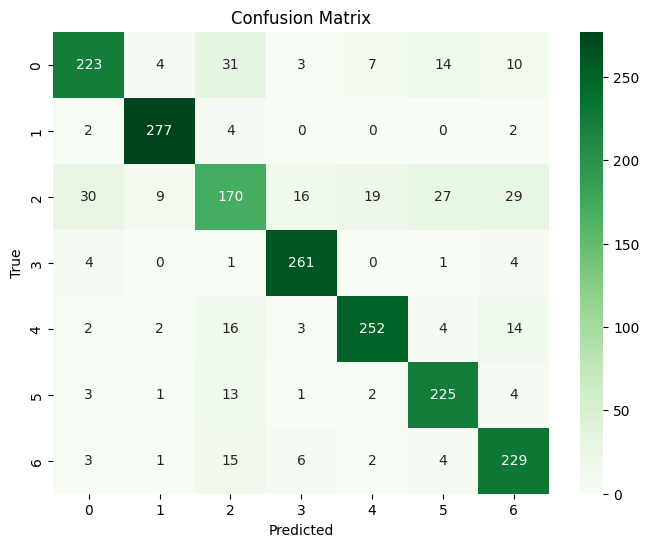

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = sorted(set(y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### LIME XAI for Emotion Detection

In [26]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=012386641737c676f56a4bad6914fe626d1b9e89acefa42de69d2d29d99cc83e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from lime.lime_text import LimeTextExplainer
from sklearn.feature_extraction.text import CountVectorizer

explainer_lime = LimeTextExplainer(class_names=['SAD', 'HATE', 'OTHER', 'FEAR', 'ANGRY', 'HAPPY', 'SURPRISE'])
predict_fn_logreg = lambda x: logreg.predict_proba(cv.transform(x))
index_to_explain = 300
text_instance_to_explain =df1['tweets'].iloc[index_to_explain]
exp = explainer_lime.explain_instance(' '.join(text_instance_to_explain), predict_fn_logreg, num_features=10)
exp.show_in_notebook(text=True)

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from lime.lime_text import LimeTextExplainer
from sklearn.feature_extraction.text import CountVectorizer

explainer_lime = LimeTextExplainer(class_names=['SAD', 'HATE', 'OTHER', 'FEAR', 'ANGRY', 'HAPPY', 'SURPRISE'])
predict_fn_logreg = lambda x: logreg.predict_proba(cv.transform(x))
index_to_explain = 600
text_instance_to_explain =df1['tweets'].iloc[index_to_explain]
exp = explainer_lime.explain_instance(' '.join(text_instance_to_explain), predict_fn_logreg, num_features=10)
exp.show_in_notebook(text=True)

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from lime.lime_text import LimeTextExplainer
from sklearn.feature_extraction.text import CountVectorizer

explainer_lime = LimeTextExplainer(class_names=['SAD', 'HATE', 'OTHER', 'FEAR', 'ANGRY', 'HAPPY', 'SURPRISE'])
predict_fn_logreg = lambda x: logreg.predict_proba(cv.transform(x))
index_to_explain = 2200
text_instance_to_explain =df1['tweets'].iloc[index_to_explain]
exp = explainer_lime.explain_instance(' '.join(text_instance_to_explain), predict_fn_logreg, num_features=10)
exp.show_in_notebook(text=True)

### Multinomial NB

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       292
           1       0.81      0.96      0.88       285
           2       0.77      0.41      0.53       300
           3       0.81      0.90      0.85       271
           4       0.76      0.86      0.81       293
           5       0.82      0.86      0.84       249
           6       0.79      0.82      0.80       260

    accuracy                           0.79      1950
   macro avg       0.79      0.79      0.78      1950
weighted avg       0.78      0.79      0.78      1950



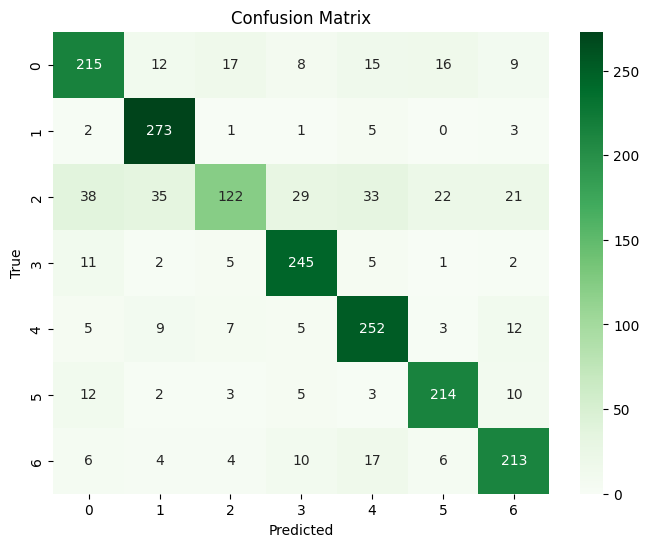

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
class_labels = sorted(set(y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### SVM

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred)
# Calculate the recall, precision, and F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       292
           1       0.98      0.94      0.96       285
           2       0.54      0.74      0.62       300
           3       0.91      0.89      0.90       271
           4       0.93      0.76      0.84       293
           5       0.87      0.77      0.81       249
           6       0.78      0.83      0.80       260

    accuracy                           0.80      1950
   macro avg       0.83      0.80      0.81      1950
weighted avg       0.82      0.80      0.81      1950



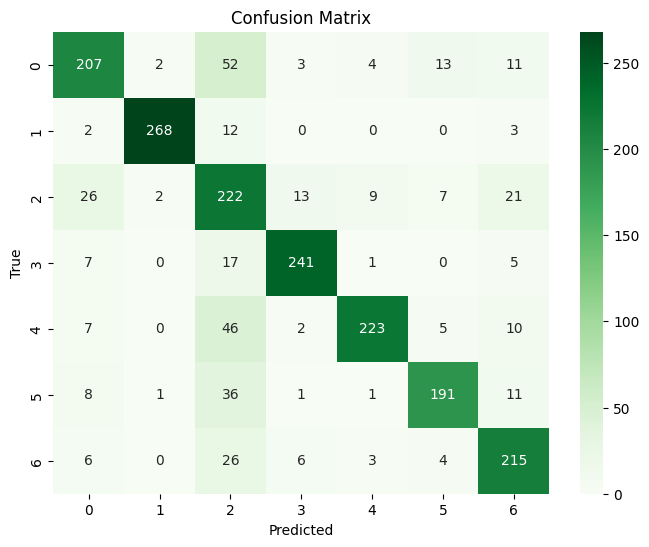

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
class_labels = sorted(set(y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Random Forest Classifier AND Explainable AI

In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from gensim.models import Word2Vec
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(df1['tweets'].apply(lambda x: ' '.join(x)))
y = df1['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.77       542
           1       0.93      0.97      0.95       539
           2       0.60      0.56      0.58       570
           3       0.91      0.94      0.92       577
           4       0.93      0.75      0.83       599
           5       0.70      0.88      0.78       516
           6       0.79      0.89      0.84       557

    accuracy                           0.81      3900
   macro avg       0.81      0.81      0.81      3900
weighted avg       0.82      0.81      0.81      3900



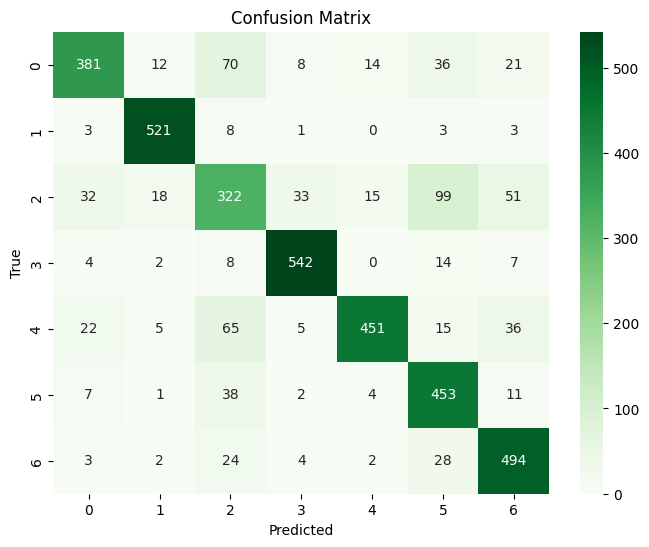

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
class_labels = sorted(set(y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Gradient Boosting Classifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.49      0.54       542
           1       0.86      0.87      0.87       539
           2       0.36      0.65      0.46       570
           3       0.85      0.82      0.84       577
           4       0.78      0.61      0.68       599
           5       0.63      0.53      0.58       516
           6       0.72      0.56      0.63       557

    accuracy                           0.65      3900
   macro avg       0.69      0.65      0.66      3900
weighted avg       0.69      0.65      0.66      3900



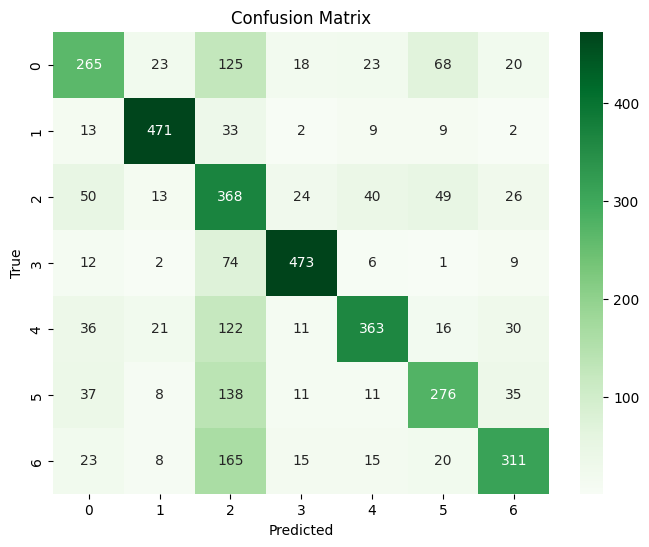

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
class_labels = sorted(set(y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### RNN

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

Found GPU at: /device:GPU:0
There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [7]:
df1

tweets  category  label
0      خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...       SAD      0
1         از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم      HATE      1
2       کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم ...       SAD      0
3      چون همش با دوربین ثبت شده  ایا میشه اعتراض زد ...     OTHER      2
4                     اين وضع ب طرز خنده داري گريه داره        SAD      0
...                                                  ...       ...    ...
12994                              عجب حرکتی  کیش و مات   SURPRISE      6
12995                             مگه اسم تعیین کنندهس    SURPRISE      6
12996        واقعا ادم حیرت میکنه از این سخنان نابخردانه  SURPRISE      6
12997  من نمیدونم از خودم برای دیگران چه تصویری ساخته...  SURPRISE      6
12998                جاااااآن  واسه کجای پایینتون دقیقا   SURPRISE      6

[12999 rows x 3 columns]

Found GPU at: /device:GPU:0
Epoch 1/10
780/780 [==============================] - 58s 65ms/step - loss: 1.2777 - accuracy: 0.5210 - val_loss: 0.8245 - val_accuracy: 0.7192
Epoch 2/10
780/780 [==============================] - 20s 25ms/step - loss: 0.3962 - accuracy: 0.8681 - val_loss: 0.6846 - val_accuracy: 0.7788
Epoch 3/10
780/780 [==============================] - 25s 33ms/step - loss: 0.1028 - accuracy: 0.9701 - val_loss: 0.7350 - val_accuracy: 0.7952
Epoch 4/10
780/780 [==============================] - 25s 32ms/step - loss: 0.0357 - accuracy: 0.9910 - val_loss: 0.8520 - val_accuracy: 0.8000
Epoch 5/10
780/780 [==============================] - 22s 28ms/step - loss: 0.0165 - accuracy: 0.9955 - val_loss: 0.9206 - val_accuracy: 0.7971
Epoch 6/10
780/780 [==============================] - 20s 26ms/step - loss: 0.0222 - accuracy: 0.9934 - val_loss: 1.1232 - val_accuracy: 0.7865
Epoch 7/10
780/780 [==============================] - 18s 23ms/step - loss: 0.0167 - accuracy: 0.9955 - val_

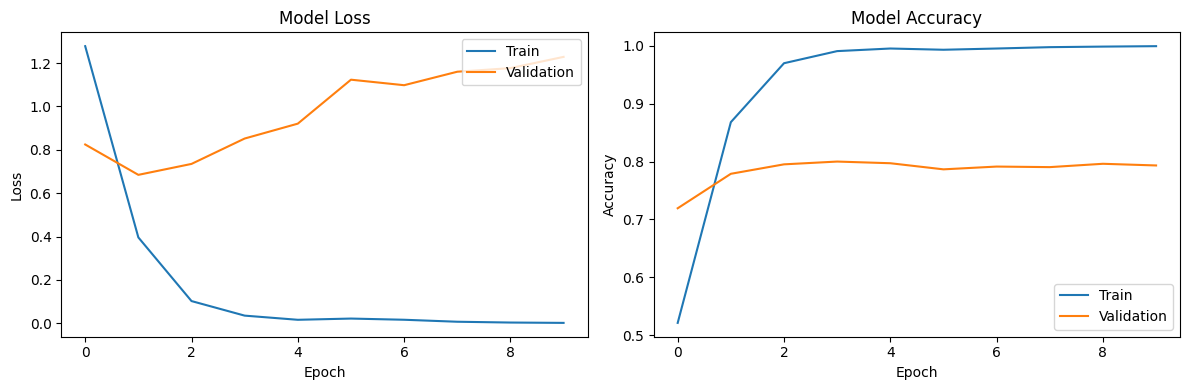

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found. Running on CPU.')
else:
    print('Found GPU at: {}'.format(device_name))
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df1['tweets'])
sequences = tokenizer.texts_to_sequences(df1['tweets'])
max_sequence_length = 500
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df1['label'], test_size=0.2, random_state=42)
num_classes = len(set(df1['label']))
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(units=100))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=12, validation_split=0.1)
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=-1)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Results and Visualization
print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.tight_layout()
plt.show()

### CNN

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found. Running on CPU.')
else:
    print('Found GPU at: {}'.format(device_name))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df1['tweets'])
sequences = tokenizer.texts_to_sequences(df1['tweets'])
max_sequence_length = 400
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df1['label'], test_size=0.2, random_state=42)
num_classes = 7
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Found GPU at: /device:GPU:0
Epoch 1/10
260/260 [==============================] - 35s 116ms/step - loss: 1.5695 - accuracy: 0.4478 - val_loss: 1.0428 - val_accuracy: 0.6817
Epoch 2/10
260/260 [==============================] - 13s 50ms/step - loss: 0.6472 - accuracy: 0.8142 - val_loss: 0.6320 - val_accuracy: 0.7889
Epoch 3/10
260/260 [==============================] - 10s 37ms/step - loss: 0.1744 - accuracy: 0.9630 - val_loss: 0.5473 - val_accuracy: 0.8260
Epoch 4/10
260/260 [==============================] - 7s 26ms/step - loss: 0.0385 - accuracy: 0.9952 - val_loss: 0.5679 - val_accuracy: 0.8245
Epoch 5/10
260/260 [==============================] - 4s 14ms/step - loss: 0.0151 - accuracy: 0.9984 - val_loss: 0.5899 - val_accuracy: 0.8255
Epoch 6/10
260/260 [==============================] - 3s 11ms/step - loss: 0.0090 - accuracy: 0.9986 - val_loss: 0.6167 - val_accuracy: 0.8245
Epoch 7/10
260/260 [==============================] - 5s 19ms/step - loss: 0.0060 - accuracy: 0.9990 - val_los

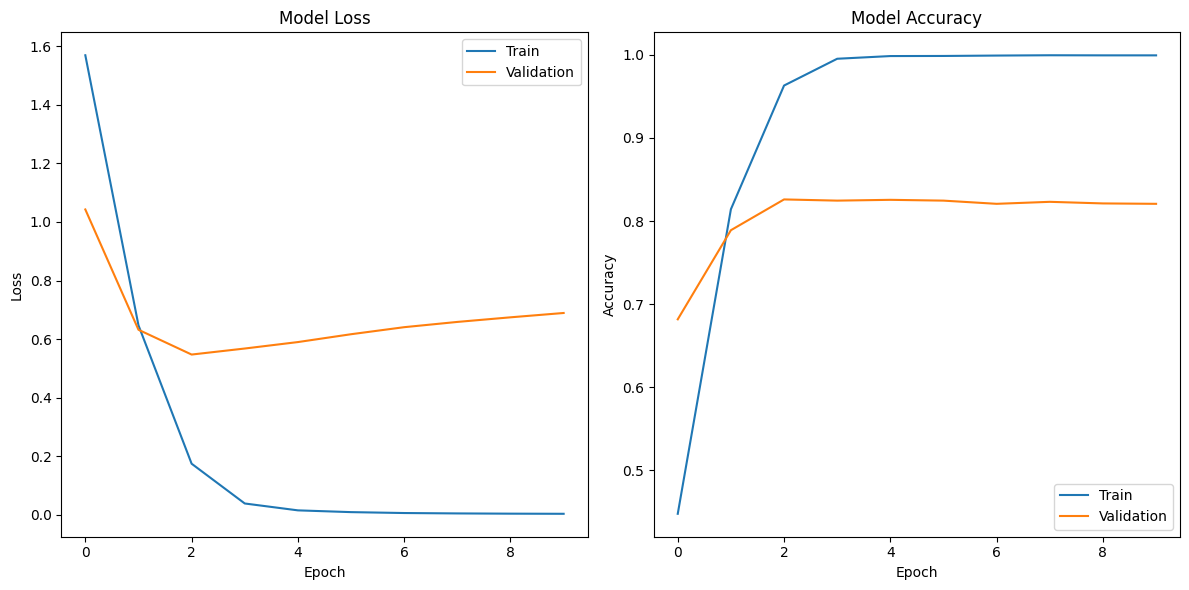

82/82 [==============================] - 0s 2ms/step
Accuracy: 0.8203846153846154
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.77       378
           1       0.93      0.98      0.95       366
           2       0.60      0.58      0.59       380
           3       0.90      0.93      0.92       379
           4       0.86      0.82      0.84       402
           5       0.87      0.85      0.86       334
           6       0.78      0.85      0.81       361

    accuracy                           0.82      2600
   macro avg       0.82      0.82      0.82      2600
weighted avg       0.82      0.82      0.82      2600



In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=-1)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

###LSTM

Found GPU at: /device:GPU:0
Epoch 1/10
260/260 [==============================] - 29s 101ms/step - loss: 1.5474 - accuracy: 0.4145 - val_loss: 0.9965 - val_accuracy: 0.6452
Epoch 2/10
260/260 [==============================] - 15s 56ms/step - loss: 0.5495 - accuracy: 0.8203 - val_loss: 0.7192 - val_accuracy: 0.7683
Epoch 3/10
260/260 [==============================] - 9s 36ms/step - loss: 0.1631 - accuracy: 0.9535 - val_loss: 0.7332 - val_accuracy: 0.7798
Epoch 4/10
260/260 [==============================] - 7s 28ms/step - loss: 0.0583 - accuracy: 0.9858 - val_loss: 0.8295 - val_accuracy: 0.7832
Epoch 5/10
260/260 [==============================] - 7s 28ms/step - loss: 0.0253 - accuracy: 0.9944 - val_loss: 0.9472 - val_accuracy: 0.7832
Epoch 6/10
260/260 [==============================] - 6s 22ms/step - loss: 0.0128 - accuracy: 0.9971 - val_loss: 1.0093 - val_accuracy: 0.7745
Epoch 7/10
260/260 [==============================] - 6s 25ms/step - loss: 0.0066 - accuracy: 0.9984 - val_loss

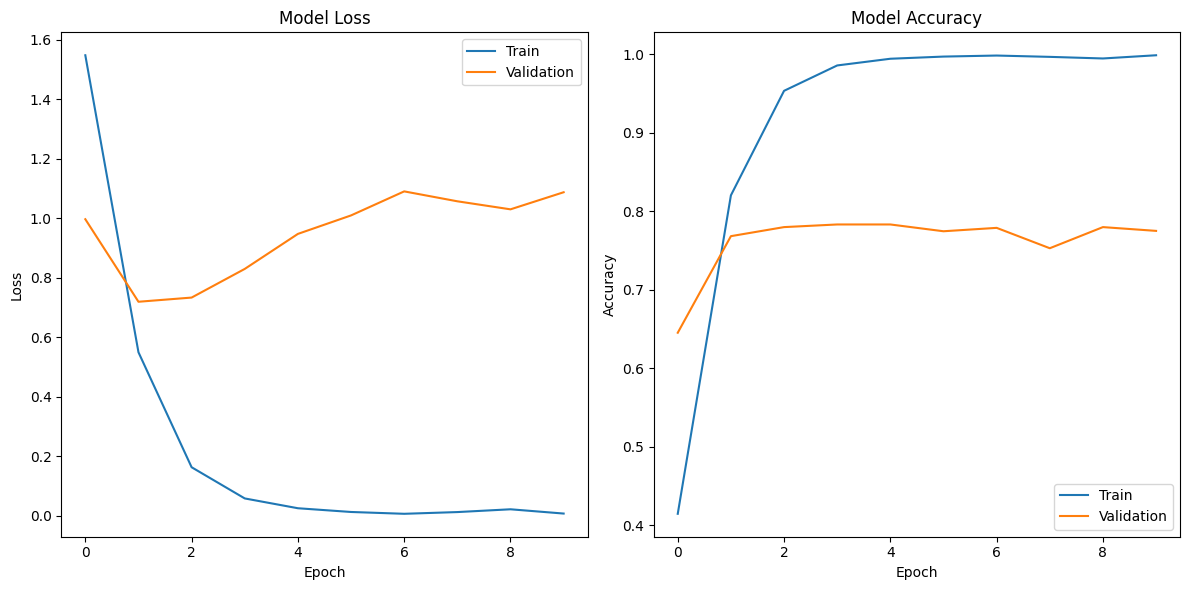

82/82 [==============================] - 1s 9ms/step
Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.65      0.68       378
           1       0.92      0.95      0.94       366
           2       0.54      0.50      0.52       380
           3       0.86      0.90      0.88       379
           4       0.85      0.81      0.83       402
           5       0.77      0.87      0.81       334
           6       0.79      0.80      0.79       361

    accuracy                           0.78      2600
   macro avg       0.78      0.78      0.78      2600
weighted avg       0.78      0.78      0.78      2600



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found. Running on CPU.')
else:
    print('Found GPU at: {}'.format(device_name))
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df1['tweets'])
sequences = tokenizer.texts_to_sequences(df1['tweets'])
max_sequence_length = 500
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df1['label'], test_size=0.2, random_state=42)
num_classes = 7
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(units=100))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.tight_layout()
plt.show()
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=-1)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

## Model Evaluation

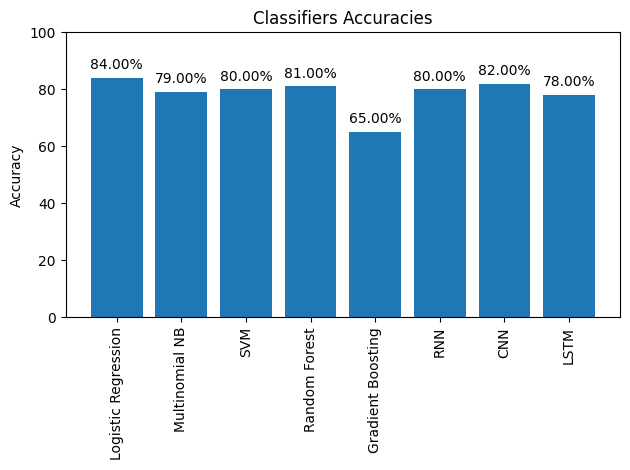

In [54]:
import matplotlib.pyplot as plt


models = ['Logistic Regression', 'Multinomial NB', 'SVM', 'Random Forest','Gradient Boosting','RNN','CNN','LSTM']
accuracies = [ 84,  79,  80, 81, 65,.80*100,.82*100,.78*100]
plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Classifiers Accuracies')
plt.xticks(rotation='vertical')

# Display the accuracies at the top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 2, f'{acc:.2f}%', ha='center', va='bottom', fontsize=10)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


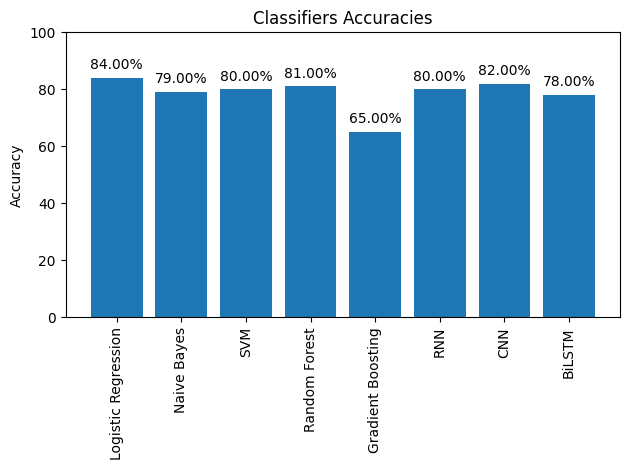

In [55]:
import matplotlib.pyplot as plt


models = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest','Gradient Boosting','RNN','CNN','BiLSTM']
accuracies =  [ 84,  79,  80, 81, 65,.80*100,.82*100,.78*100]


plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Classifiers Accuracies')
plt.xticks(rotation='vertical')

# Display the accuracies at the top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 2, f'{acc:.2f}%', ha='center', va='bottom', fontsize=10)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


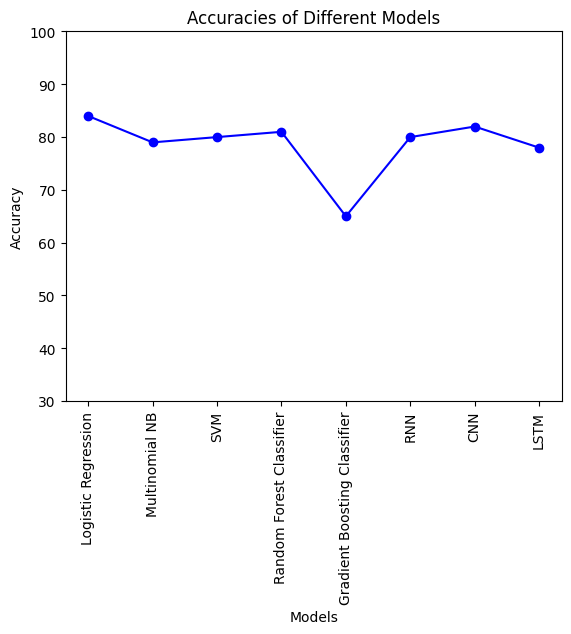

In [57]:
import matplotlib.pyplot as plt
models = ['Logistic Regression', 'Multinomial NB', 'SVM', 'Random Forest Classifier','Gradient Boosting Classifier','RNN','CNN','LSTM']
accuracies = [84,  79,  80, 81, 65,.80*100,.82*100,.78*100]
plt.plot(models, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracies of Different Models')
# Set the y-axis limits from 50 to 100
plt.ylim(30, 100)
plt.xticks(rotation='vertical')
plt.show()

